<a href="https://colab.research.google.com/github/kishore145/AI-ML-Foundations/blob/master/Neural%20Networks/17_Alexnet_using_tensorlfow_on_mnist_and_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer the original alexnet paper here: 
https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf  

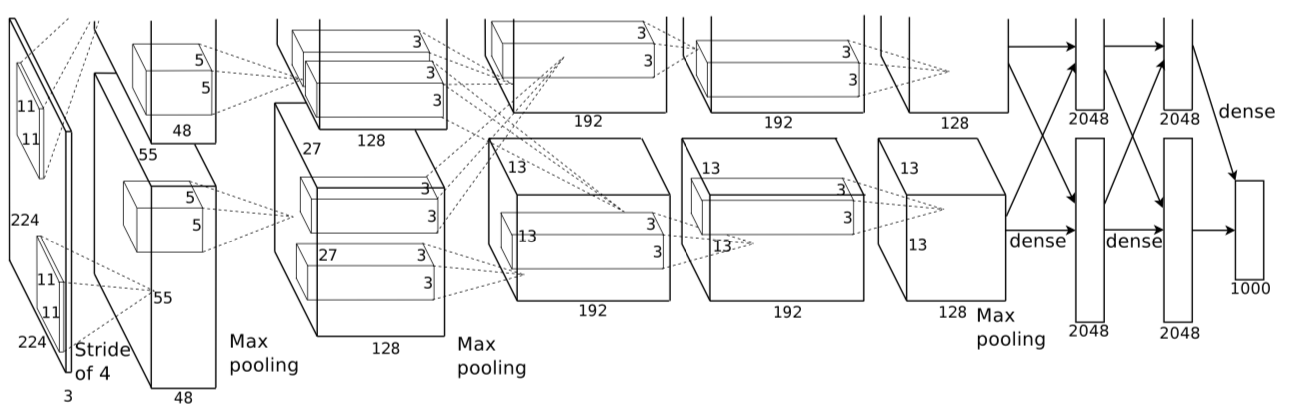

# Load dependencies and pre-process data

In [1]:
# Load dependencies
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [2]:
# Load mnist data
(X_train_mnist, y_train_mnist), (X_valid_mnist, y_valid_mnist) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
(X_train_cifar, y_train_cifar), (X_valid_cifar, y_valid_cifar) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
# Check the shape of the data to ensure data is downloaded correctly
def datashape(X_train, y_train, X_valid, y_valid):
  print(f'''
  X_train shape: {X_train.shape},
  y_train shape: {y_train.shape},
  X_valid shape: {X_valid.shape},
  y_valid shape: {y_valid.shape}''')


In [5]:
# Review the revised shape of feature vector and target labels
print('Shape of mnist data set:')
datashape(X_train_mnist, y_train_mnist, X_valid_mnist, y_valid_mnist)
print('Shape of cifar data set:')
datashape(X_train_cifar, y_train_cifar, X_valid_cifar, y_valid_cifar)

Shape of mnist data set:

  X_train shape: (60000, 28, 28),
  y_train shape: (60000,),
  X_valid shape: (10000, 28, 28),
  y_valid shape: (10000,)
Shape of cifar data set:

  X_train shape: (50000, 32, 32, 3),
  y_train shape: (50000, 1),
  X_valid shape: (10000, 32, 32, 3),
  y_valid shape: (10000, 1)


In [6]:
# Reshape the numpy array to float32
# Preprocess data - Input to conv is a 4D tensor with shape (batch_size, rows, cols, channels) as default which can be changed by data_format, 
def preprocess(X_train, y_train, X_valid, y_valid, X_trainshape, X_validshape, n_classes):
  X_train = X_train.reshape(X_trainshape).astype('float32')
  X_valid = X_valid.reshape(X_validshape).astype('float32')
  X_train /= 255.
  X_valid /= 255.
  y_train = to_categorical(y_train, n_classes)
  y_valid = to_categorical(y_valid, n_classes)

  return X_train, y_train, X_valid, y_valid


In [7]:
n_classes = 10

In [8]:
X_train_mnist, y_train_mnist, X_valid_mnist, y_valid_mnist = preprocess(X_train_mnist, y_train_mnist, 
                                                                        X_valid_mnist, y_valid_mnist,
                                                                        (60000, 28, 28, 1), (10000, 28,28,1),
                                                                        n_classes)

X_train_cifar, y_train_cifar, X_valid_cifar, y_valid_cifar = preprocess(X_train_cifar, y_train_cifar, 
                                                                        X_valid_cifar, y_valid_cifar,
                                                                        (50000, 32, 32, 3), (10000, 32,32,3),
                                                                        n_classes)

# Review the revised shape of feature vector and target labels
print('Shape of mnist data set:')
datashape(X_train_mnist, y_train_mnist, X_valid_mnist, y_valid_mnist)
print('Shape of cifar data set:')
datashape(X_train_cifar, y_train_cifar, X_valid_cifar, y_valid_cifar)

Shape of mnist data set:

  X_train shape: (60000, 28, 28, 1),
  y_train shape: (60000, 10),
  X_valid shape: (10000, 28, 28, 1),
  y_valid shape: (10000, 10)
Shape of cifar data set:

  X_train shape: (50000, 32, 32, 3),
  y_train shape: (50000, 10),
  X_valid shape: (10000, 32, 32, 3),
  y_valid shape: (10000, 10)


# Design Alexnet neural network

In [9]:
# Strides are reduced due to low pixel count of the cifar & mnist dataset

def alexnet(input_shape):

  # Create model
  model = Sequential()

  # First conv pool block:
  model.add(Conv2D(filters = 96, kernel_size=(11,11), strides = 1, 
                  activation = 'relu', input_shape = input_shape))
  model.add(MaxPooling2D(pool_size=(3,3), strides=1))
  model.add(BatchNormalization())

  # Second conv pool block:
  model.add(Conv2D(filters = 256, kernel_size=(5,5), strides = 1, 
                  activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(3,3), strides = 1))
  model.add(BatchNormalization())

  # Third conv pool block consiting of 3 conv layers:
  model.add(Conv2D(filters = 256, kernel_size=(3, 3), strides = 1, 
                  activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size=(3, 3), strides = 1, 
                  activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size=(3, 3), strides = 1, 
                  activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(3,3), strides=1))
  model.add(BatchNormalization())

  # Fully connected dense neural networks:
  model.add(Flatten())
  model.add(Dense(units = 4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units = 4096, activation='relu'))
  model.add(Dropout(0.5))

  # O/p layer
  model.add(Dense(10, activation='softmax'))

  # compile model
  model.compile(loss = 'categorical_crossentropy', optimizer = 'nadam', metrics = ['accuracy'])

  # Display model summary
  print(model.summary())

  # Return model
  return model


In [12]:
model1 = alexnet((28, 28, 1))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 96)        11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         5

In [13]:
# Setting model checkpoint
# Set o/p directory
output_dir = 'model_output/alexnet/mnist'

modelcheckpoint = ModelCheckpoint(filepath=output_dir + '/weights.{epoch:02d}.hdf5', 
                                  monitor = 'val_accuracy', save_best_only = True)

# Verifying o/p path exists
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [14]:
model1.fit(X_train_mnist, y_train_mnist, 
           batch_size=128, epochs = 4, verbose = 1, 
          validation_data = (X_valid_mnist, y_valid_mnist), 
          callbacks = [modelcheckpoint])

Epoch 1/4
469/469 [==============================] - 53s 112ms/step - loss: 0.3051 - accuracy: 0.9329 - val_loss: 0.1868 - val_accuracy: 0.9479
Epoch 2/4
469/469 [==============================] - 52s 110ms/step - loss: 0.1018 - accuracy: 0.9748 - val_loss: 0.0894 - val_accuracy: 0.9791
Epoch 3/4
469/469 [==============================] - 51s 108ms/step - loss: 0.0875 - accuracy: 0.9794 - val_loss: 0.1251 - val_accuracy: 0.9761
Epoch 4/4
469/469 [==============================] - 50s 108ms/step - loss: 0.0844 - accuracy: 0.9806 - val_loss: 0.1579 - val_accuracy: 0.9652


In [15]:
# Setting model checkpoint
# Set o/p directory
output_dir = 'model_output/alexnet/cifar'

modelcheckpoint = ModelCheckpoint(filepath=output_dir + '/weights.{epoch:02d}.hdf5', 
                                  monitor = 'val_accuracy', save_best_only = True)

# Verifying o/p path exists
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [18]:
model2 = alexnet((32, 32, 3))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 96)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 20, 20, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 256)      

In [19]:
model2.fit(X_train_cifar, y_train_cifar, 
           batch_size=128, epochs = 10, verbose = 1, 
          validation_data = (X_valid_cifar, y_valid_cifar), 
          callbacks = [modelcheckpoint])

Epoch 1/10
391/391 [==============================] - 96s 245ms/step - loss: 2.1926 - accuracy: 0.3055 - val_loss: 2.5015 - val_accuracy: 0.2436
Epoch 2/10
391/391 [==============================] - 94s 240ms/step - loss: 1.5789 - accuracy: 0.4324 - val_loss: 1.9300 - val_accuracy: 0.3552
Epoch 3/10
391/391 [==============================] - 94s 240ms/step - loss: 1.4645 - accuracy: 0.4850 - val_loss: 1.6699 - val_accuracy: 0.4306
Epoch 4/10
391/391 [==============================] - 94s 240ms/step - loss: 1.3547 - accuracy: 0.5293 - val_loss: 1.7537 - val_accuracy: 0.4318
Epoch 5/10
391/391 [==============================] - 91s 232ms/step - loss: 1.2664 - accuracy: 0.5649 - val_loss: 2.3209 - val_accuracy: 0.3721
Epoch 6/10
391/391 [==============================] - 94s 240ms/step - loss: 1.1814 - accuracy: 0.5943 - val_loss: 1.4566 - val_accuracy: 0.4988
Epoch 7/10
391/391 [==============================] - 91s 232ms/step - loss: 1.1340 - accuracy: 0.6068 - val_loss: 2.3583 - val_ac

# Model evaluation

In [20]:
# Evaluating mnist model - 
model1.load_weights(filepath = 'model_output/alexnet/mnist' + '/weights.02.hdf5')
model1.evaluate(X_valid_mnist, y_valid_mnist)

313/313 [==============================] - 3s 11ms/step - loss: 0.0894 - accuracy: 0.9791


[0.08938787132501602, 0.9790999889373779]

In [22]:
# Evaluating cifar model - 
model2.load_weights(filepath = 'model_output/alexnet/cifar' + '/weights.10.hdf5')
model2.evaluate(X_valid_cifar, y_valid_cifar)

313/313 [==============================] - 6s 18ms/step - loss: 1.2839 - accuracy: 0.5430


[1.283880352973938, 0.5429999828338623]

In [23]:
# As is evident, alexnet architecture starts overfitting on mnist from second epoch
# while in the case of cifar, the epoch count of 10 is too small to get good results and require longer training cycles.
# This architecture with big kernel sizes are not created for small images as in cifar and mnist and hence not suitable
# for these datasets. But for studying the architecture, we have used them.